<center><img src="https://drive.google.com/uc?export=view&id=1tD8n1cNZuBXq3-5O4ptnhkMFDLYf_GVO" width=640 /></center>

<br/>

<font size=6>
<center>Lesson 2: Hands-on Linear Models
</center>
</font>

<font size=4>
<center><i>Classifying user reviews with machine learning</i>
</center>
</font>

# 1. Introduction

## Lesson Overview

In the last lesson, as an example of a machine learning model, we gave a brief introduction to the linear classification algorithm. We haven't seen it in practice yet, so that will be our goal this time around.

In this lesson, you will:



* See how to load and prepare **text data** for machine learning algorithms
* Learn how to train models using the **scikit-learn** library
* Gain a deeper understanding of how **linear models** work

Further, this lesson is structured to follow the typical steps involved in ML design:



* In section 2, we’ll define the task, then load and explore the data
* In section 3, we’ll prepare the data for machine learning
* In section 4, we’ll train and evaluate the model

We’re still exploring linear models because they are some of the simplest to understand and work with. Additionally, there are many complex models that build upon linear models (including neural networks), so this knowledge will also be helpful in the future.

<center><img src="https://drive.google.com/uc?export=view&id=1aBiO4zVwBbzpdXqKn4ONEIAm-SB5CW2m" width=1000 /></center>

## Running the code

We’re going to start running code beginning with this lesson – so naturally, you’ll need a way to actually do that. Here are some options for you:

1. Run the code here, in Google Colab. You’ll need to copy this notebook to your Google Drive to be able to edit it (File - Save a copy in Drive).

2. Upload the notebook to some other cloud Jupyter service and work with it there. Example services:
    * [https://studiolab.sagemaker.aws/](https://studiolab.sagemaker.aws/)
    * [https://www.kaggle.com](https://www.kaggle.com)
    * [https://www.paperspace.com/](https://www.paperspace.com/)
3. Install [Jupyter Notebook](https://jupyter.org/install) on your computer. Here are the libraries we’ll use in our lessons; you can install them right away, or as needed:
    * tqdm;
    * numpy, matplotlib, pandas;
    * scikit-learn;
    * torch;
    * HuggingFace's datasets, transformers;
    * openai, langchain, langchain-openai, duckduckgo-search, langchainhub.

# 2. Task and Dataset

## Defining the Task

The dataset for this lesson is a collection of reviews from Yelp. It contains text reviews for different businesses (restaurants, doctors, gyms, etc.) coupled with ratings on a 1-5 scale for each review.

So, we’ll be working with text data, just like before, but this time our task is different: we want to train a model that predicts the rating based on the text (and this could be useful for other apps where a rating is not mandatory). In order to achieve this, we can formulate this as a supervised learning task where:

* The **object** is the text review
* The **target** is the star rating

<center>
<img src="https://drive.google.com/uc?export=view&id=1pI71j4qY6SG6qo2UXXnPNpdPBNLLy5ZB" width=320 />
</center>

One new thing here is that now we’ll be working with **multiclass classification**. This is a classification task where we need to distinguish between more than two classes. The accuracy metric that we used before still works – we’re still counting the number of correct predictions, there are just more options this time, however, the linear model needs to be updated, and we will do this in later sections.

With that, let's load and inspect the data.

## The Hugging Face Ecosystem

We’ll be using the **Hugging Face** ecosystem to get the data we need. This is a popular collection of machine learning tools, and beyond this current task, we’ll also use some other stuff from it in the further lessons. If you’re wondering why it has the name it does, it's simply a reference to this emoji: 🤗.

We’ll be using the library called datasets, which is a wrapper for the collection of datasets.

In [ ]:
# install the library

!pip install -qq datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


Yelp reviews is a well-known dataset, so we can just load it by its name; here is the dataset search page: [https://huggingface.co/datasets?sort=downloads&search=yelp](https://huggingface.co/datasets?sort=downloads&search=yelp)

In [ ]:
from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Let's take a look at what it gave us.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})

This is a wrapper that doesn't show any data examples, but it gives us a high-level structure: the features and the size. We can also see that there are two parts to the dataset, "train" and "test". We briefly touched on this in the first lesson, but we haven't given a proper explanation, so let's do that now.

## Train and Test Data


When designing ML models, it’s a common practice to split the available data into two parts:



* **Training data** – this is used to train the model, which, as you recall, means acquiring the values of the parameters of the model. Usually this is done by finding those parameters that give the best quality of training data.
* **Testing data** — this is used to report the quality of the model after training; it is not used in any of the training steps.

Splitting the data in this way is necessary in order to be certain that our model will not experience a dramatic loss of quality once deployed in the real world.

To illustrate, when a model performs well on training data, but has poor quality on test data, this is called **overfitting** – and is obviously something we want to avoid. Measuring quality on both training and testing datasets helps us distinguish between overfitted models and those that were simply not trained well.

Below is a simple example of a 2-dimensional dataset with two classes (displayed as blue and red). Note that we’re only showing the training dataset to avoid clutter. The first image shows the desired trained model followed by two models to the right with different levels of overfitting.

<center>
<img src="https://drive.google.com/uc?export=view&id=1IWVIhgXrABo1LkDUBxcxYnKwSCGjRide" width=600 />
</center>

Overfitting can happen if a model learns the exact examples and answers from the training data “too well” – learning without really getting the meaning behind them. (You might think of this scenario a bit like studying for an exam by just memorizing all the answers in a textbook without actually understanding them.)

There are many ways to fix overfitting (and we won’t go into them in great detail here), however, let’s mention just one way it can be done: If we can somehow considerably increase the size of a training dataset, at some point, the model will be unable to just memorize it – it will be forced to learn something. Using our earlier analogy — if you only have access to 30 questions to study, you could easily just memorize them all and perform well. But, when you encounter questions on the exam outside the available 30 you had to study, you'll lack the necessary knowledge and probably fail. However, if you have access to one hundred textbooks worth of material to prep for the test, rather than memorizing answers, you’ll actually have to learn the concepts, and thus, you'll be able to formulate the correct answers.

<center><img src="https://drive.google.com/uc?export=view&id=1sEZBQ67irDcPYDNukFZj1WEnmL8lZURi" width=320 /></center>

## Looking at the Data

Before we start to apply machine learning methods, let's inspect the dataset a little bit to get a better grasp of what we’re working with.

In [ ]:
# access the first sample of the training dataset - text and target

dataset['train'][0]

{'label': 4,
 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}

In [ ]:
# access the specific column of the dataset (first 10 elements)

dataset['train']['label'][:10]

[4, 1, 3, 3, 0, 4, 4, 0, 1, 2]

Notice that the ratings are zero-indexed: that is, the value "4" corresponds to 5 stars.

Now, let's check how common the different star ratings are. Consider this: if some ratings are significantly more or less common than the others, it can be hard for the model to work with this data, and it will be difficult for us to properly estimate the quality (we’ll talk about the reasons for this later in the lesson).

In the following exercises, we’ll be using the pandas library to process data more easily. We encourage you to use pandas, too. You can look up anything that you don't know – perhaps you’ll be able to use it even if you’re not familiar with the library at all (we will leave some hints in that case). That said, you can still solve it in another way if you prefer.

**Exercise.** For each star rating (the value of the 'label' column) find the number of objects with this rating.

<details>
    <summary><font color="404090">Hints for pandas (click to expand).</font></summary>
    
- `Series` data type;
- a counting values function.
</details>

In [ ]:
# <your code here>







In [ ]:
# <SOLUTION>

import pandas as pd
pd.Series(dataset['train']['label']).value_counts().sort_index()

0    130000
1    130000
2    130000
3    130000
4    130000
Name: count, dtype: int64

We can see that the data is perfectly balanced – there is an equal amount of reviews for all of the star ratings. This is good because it simplifies the task for us. Although this is probably not a natural distribution and the data was just sampled this way, we will treat this as a part of the task, and won't be manually rebalancing the data.

Now, let’s check how the lengths of the texts are distributed. A large amount of short texts will probably mean a harder task ahead.

**Exercise.** Plot the histogram showing the distribution of sizes of the texts. The size is defined as the number of words (to make things simple, we can consider them as being split by whitespaces). Additionally, create auxiliary variable `sizes` with a pandas series for all the sizes – this will be useful in the future tasks.

<details>
    <summary><font color="404090">Hints for pandas (click to expand).</font></summary>
    
- Use the `hist()` method from the `Series` datatype.
</details>

In [ ]:
# <your code here>







<Axes: >

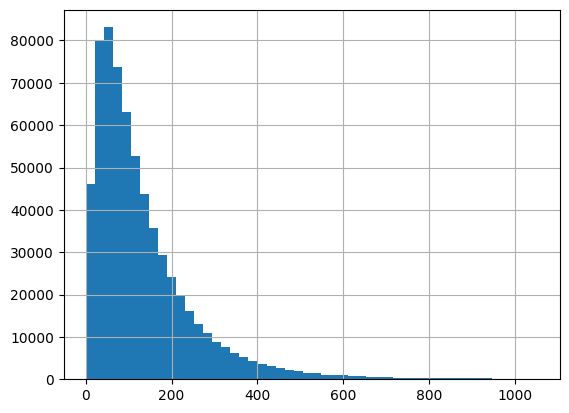

In [ ]:
# <SOLUTION>

def calc_wordlen(text):
    return len(text.split())

sizes = pd.Series(map(calc_wordlen, dataset['train']['text']))

sizes.hist(bins=50)

We can see that most of the texts are around 100-300 words – which seems like a reasonable size – while texts with higher word counts are more rare. We can also observe that there is some substantial amount of shorter texts; let's check how frequent the extremely short ones are, (let’s say those that are 5 words or less).

In [ ]:
(sizes <= 5).mean() * 100

0.6656923076923077

It turns out that the short texts represent less than 1% of the total amount, which is good, and we won't bother too much about them. But, let’s check out some examples, just to see what they are like.

In [ ]:
pd.Series(dataset['train']['text'])[sizes <= 5].head(20)

18                  Good fish sandwich.
28                              Hoofah.
337                               Nope!
389               It's not that delish.
457                               ewwww
547                               Great
571                   Not Tasty At All.
1014                                  A
1037                  Always fantastic.
1042                          Fabulous!
1154                 Awesome fast pizza
1268          5 time Super Bowl champs.
1283                   Out of business.
1348    Always leaving incredibly happy
1531                   It's an IGA now.
1549           best pizza on beverly rd
1594                        Beer cave!!
1613            New menu! Check it out!
1760           good burgers and soup!!!
1772            Consumer alert... rats!
dtype: object

We can see that, even for some of the one-word reviews, it’s possible to guess the probable star rating, which is good.

Okay, now that we’ve sufficiently familiarized ourselves with the data, let's move on to the next steps.

# 3. Data Preparation

We need to convert the raw texts into numerical features so that the model can work with them. Similarly to the previous lesson, for each text, we’ll just split the texts into words and check which are present. Also, let's improve our model a little bit: instead of just zeros and ones, let's count how many times each word is present in the text. This method of converting texts into features is called the **bag of words** model — meaning that only the word counts, not the word order.

<center><img src="https://drive.google.com/uc?export=view&id=1klqjx2alocibbNi5Qt2R0lK-HfzbFFhe" width=320 /></center>

In this lesson, we’ll be using **scikit-learn** (short for "scientific kit for machine learning"), which is also called “sklearn”. This is also a popular library that implements many fundamental machine learning models and tools. (You can take a look at their [website](https://scikit-learn.org/) before moving on.)

Scikit-learn contains a submodule called sklearn.feature_extraction.text that is dedicated to transforming texts into features. From this submodule, we’ll need the CountVectorizer class (that is, "vectorizing texts by counting"); let's import and create an instance of it.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# using all default arguments, will discuss it later
vectorizer = CountVectorizer()

Next, we need to apply it to our dataset, a process which consists of two steps:

1. Create a dictionary of words in the dataset. This is done by using the `fit()` method. This is a standard method name in scikit-learn for anything that takes data and sets stuff up inside the model. (For example, later in this lesson, to train a model we’ll also call this method.)
2. Compute the word counts. This is done using the `transform()` method. This is a standard method name in scikit-learn for anything that takes data, transforms it, and outputs that data in some new form, according to the parameters inside (usually those are set up by a previous `fit()` call.)

This many functions may seem a little confusing, so let's take a look ahead and overview the whole pipeline. In addition to this `CountVectorizer` class, we’ll have a class called `LogisticRegression` for our model. This class also comes with two functions: `fit()` for training, and `predict()` for making predictions. Together they form this pipeline:



* **Setup:** Initialize both CountVectorizer and LogisticRegression with the appropriate configuration.
* **Train:** Use the `fit()` and `transform()` functions from CountVectorizer to train the dictionary and build features. Then, use the `fit()` function from `LogisticRegression` to train the model.
* **Test:** Use only the `transform()` function fromCountVectorizer (the dictionary was already built in the previous step), then use the `predict()` function from `LogisticRegression` to run the model predictions.

<center>
<img src="https://drive.google.com/uc?export=view&id=1PK-MDS7QUIFw5aNuNrCmLzWZWgkLcmgG" width=800 />
</center>

Don't worry if you don't understand the details of each of these, we’ll get to that later. For now, it's just important that we understand the outline of the overall flow.

<details>
    <summary><font color="404090">Why is it implemented like this? (click to expand).</font></summary>
    
The developers of sklearn wanted to make all the interfaces as uniform as possible, so that in more complex scenarios it would be easier to pipe many components together. The idea is that each algorithm should be structured like this:

- The algorithm is a class that takes algorithm settings (also called **hyperparameters**) in the initialization, and stores all the parameters acquired from data as attributes.

- To get parameters from data, we call the `fit()` function.

- To do something with the data, we call either the `transform()` function (converting data into a different form, as in the example with vectorizer) or the `predict()` function (for model predictions).

This makes most machine learning designs uniform:

- First we set things up by creating instances of all the necessary classes.

- We then train the model by combining the `fit()` and `transform()` functions.

- Last, we test the model, by combining the `transform()` and `predict()` functions (and we no longer have to call `fit()`!).


<img src="https://drive.google.com/uc?export=view&id=1khrkB11MzjXFKphJU-XbN7-skwCZW9_6" width=600/>

    
<br/>
</details>

**Exercise.** Fit and transform the dataset with the `vectorizer`. You can check out the [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) if you need help.

Note: the transform function can take up to several minutes to run.

In [ ]:
%%time

# <your code here>







CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [ ]:
%%time

# <SOLUTION>

vectorizer.fit(dataset['train']['text'])
features_train = vectorizer.transform(dataset['train']['text'])

CPU times: user 2min 37s, sys: 2.82 s, total: 2min 40s
Wall time: 2min 43s


Now, let’s inspect the `features_train` object to get familiar with the format.

In [ ]:
features_train.shape

(650000, 242886)

This is a matrix where each row corresponds to one text, and each column corresponds to one word in the dictionary.

<center>
<img src="https://drive.google.com/uc?export=view&id=1BdK0AxBZ-dug44-xCsmJ65A19h9YM3OT" width=600 />
</center>

Note that we have more that 200k words here – which is a lot! Let’s take a look at them.

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'],
      dtype=object)

The words are sorted in alphabetical order, so we only see some quite strange items at the beginning and in the end. But it is also clear that this vectorizer took literally all of the words in the text, which is the reason for such a high number. (Further, it doesn't understand different forms of the same word, e.g. it treats the words “patient” and “patients” as completely separate with no connection, but let’s leave that point aside for the moment.)

Next up, let’s take a look at one data sample to better understand the format:

In [ ]:
# first raw text entry

dataset['train'][0]['text']

"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."

In [ ]:
# first row in the matrix

features_train[0]

<1x242886 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

This is a special **sparse** format that is useful for big matrices with lots of zeros; this is because it only stores non-zeros. We need to extract the values using the `nonzero()` function that gives a list of non-zero coordinates.

In [ ]:
# The zip(*...) transform is needed because function gives a list of lists of each coordinate values,
# and we need a list of pairs of coordinates.
for row, col in zip(*features_train[0].nonzero()):
    print(col, features_train[0, col])

9357 1
11507 1
13992 1
15012 3
16221 1
25875 1
29000 1
35226 1
36860 1
38568 1
46987 1
60777 1
62243 1
62410 1
64365 1
70334 1
71528 1
75667 1
77758 1
82989 1
83652 1
85572 1
90550 1
91273 2
91316 1
91569 3
92690 1
93492 2
93753 1
95415 1
98613 1
98825 3
102356 1
115768 1
121979 1
127666 1
129696 1
137129 2
140961 1
146439 1
154359 1
155380 1
155469 1
156457 1
161366 1
162356 1
162451 1
169848 1
176626 2
178147 1
189967 2
190008 1
194724 1
197972 1
199470 1
206021 1
208069 1
211784 1
212825 1
213483 6
214282 1
216946 1
230851 1
235681 1
235976 1
237420 1
237475 2
240846 3


The data is not very interpretable like this, but we can use our dictionary to get the words by indexes, and then pair them up to print in a readable way:

In [ ]:
words = vectorizer.get_feature_names_out()
for row, col in zip(*features_train[0].nonzero()):
    word = words[col]
    print(word, '-', features_train[0, col])

about - 1
affiliated - 1
always - 1
and - 3
any - 1
being - 1
blank - 1
but - 1
can - 1
case - 1
complaints - 1
do - 1
dr - 1
drawing - 1
easy - 1
everything - 1
explained - 1
first - 1
for - 1
general - 1
get - 1
goldberg - 1
happens - 1
have - 2
having - 1
he - 3
here - 1
him - 2
his - 1
hospital - 1
important - 1
in - 3
is - 1
look - 1
me - 1
more - 1
my - 1
need - 2
nice - 1
notch - 1
nyu - 1
of - 1
offers - 1
on - 1
parents - 1
patients - 1
patronizing - 1
practitioner - 1
really - 2
referrals - 1
see - 2
seeing - 1
sitting - 1
something - 1
specialists - 1
surgery - 1
talk - 1
think - 1
time - 1
to - 6
top - 1
trying - 1
very - 1
what - 1
which - 1
with - 1
without - 2
you - 3


Okay, so now that we understand how this vectorizer works, let's try to reduce the size of the dictionary, so that it will be easier to work with in the next steps. The easiest way to do this is to discard the words with the lowest and highest appearances in the dataset. In other words:

* If some word appears too many times (e.g. in more than in 80% of the texts), it probably means it's just some auxiliary word that has no impact on the overall meaning. These include words like "and", "so", "than".
* If some word appears too few times (e.g. in less than 5 texts), we won’t have enough data to properly understand its meaning.

Here, we’re using a **document frequency** statistic for each word; this is the number of texts from the dataset in which the word appears at least once (the classical term for a single data point in a collection of texts is “**document**”). If the word is used several times in a document, it doesn't impact document frequency.

Luckily, we don't need to implement these filters by ourselves, the CountVectorizer class already has them implemented.


**Exercise.** Look up the appropriate parameters in the `CountVectorizer`, and then set them up so that it filters some words as described above.

In [ ]:
%%time

# <your code here>







CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [ ]:
%%time

# <SOLUTION>

vectorizer = CountVectorizer(min_df=5, max_df=0.8)
vectorizer.fit(dataset['train']['text'])
features_train = vectorizer.transform(dataset['train']['text'])

CPU times: user 2min 42s, sys: 2.74 s, total: 2min 45s
Wall time: 2min 47s


In [ ]:
features_train.shape

(650000, 68333)

Good, the number of features is now greatly reduced, and we can proceed to training the model.

# 4. Training Linear Model

Again, in this lesson, we’ll be working with the linear classifier model. Let’s first explain how this model works in more detail, and then we’ll write the code to train it.

## Multiclass Linear Formulas

First, we need to update our linear formula because now we’re working with a **multiclass classification**. The main problem is that we currently cannot handle this with just one score as before, because one score can only distinguish between two outcomes (positive versus negative), yet we have five. So how do we fix it?

One idea is to just make more scores. We’ll have 5 scores, one for each of the classes, and each of them will tell us how probable the corresponding class is. Then, the predicted class will be just the one with the highest score.

Now, let's put this into a formula. Let's denote our number of classes as $M$ — we’re using a letter just to make our formula work for any task, and in this specific task we have  $M = 5$. Then, instead of one score $s$, we now have $M$ scores: $s_1, \ldots, s_M$.

In order to compute these scores, we need features and weights.

$x_1, \ldots, x_N$ are, as before, **features** that the model takes as input, in our case these are word counts after applying `CountVectorizer`.

$N$  is the number of features or size of the dictionary.

For the **weights** we will now need to use double-indexing, because we have two dimensions for them: $M$ classes and $N$ features. Starting with the first class, we have a weight for each feature, and they look like this: $\color{magenta}{w_{11}}, \color{magenta}{w_{12}}, \ldots, \color{magenta}{w_{1j}}, \ldots, \color{magenta}{w_{1N}}$; the first index is a class index (here it is "1"), and the second index is a feature index (which goes from 1 to $N$). Thus, the formula for the first class score becomes:

$$
s_1 = \color{magenta}{w_{11}} x_1 + \color{magenta}{w_{12}} x_2 + \ldots + \color{magenta}{w_{1N}} x_N.
$$

<details>
    <summary><font color="404090"> See a comparison with the old formula (click to expand).</font></summary>
    


This is similar to our formula for the **binary classification**

$$
s = \color{magenta}{w_1} x_1 + \color{magenta}{w_2} x_2 + \ldots + \color{magenta}{w_N} x_N,
$$

but we’ve added an index of "1" to the score and to the weights.

<br/>
</details>

Next, we will do the same thing for the second class, third class, and so on, just using a different first index for each one.

All in all, we have $N \times M$ weights, and weight $\color{magenta}{w_{ij}}$ is used to compute scores for the class $i$ (ranges from 1 to $M$) and is multiplied by the feature $j$ (ranges from 1 to $N$). So, the full formula for the scores becomes:

$$
\begin{align}
s_1 & = \color{magenta}{w_{11}} x_1 + \color{magenta}{w_{12}} x_2 + \ldots + \color{magenta}{w_{1N}} x_N; \\
s_2 & = \color{magenta}{w_{21}} x_1 + \color{magenta}{w_{22}} x_2 + \ldots + \color{magenta}{w_{2N}} x_N; \\
& \ldots \\
s_M & = \color{magenta}{w_{M1}} x_1 + \color{magenta}{w_{M2}} x_2 + \ldots + \color{magenta}{w_{MN}} x_N.
\end{align}
$$

<br/>
<details>
    <summary><font color="404090"> This can also be written as matrix operations (click to expand).</font></summary>
    
$$
     \begin{pmatrix}
         s_{1}\\
         s_{2}\\
         \vdots\\
         s_{M}
     \end{pmatrix}
     =
     \color{magenta}{\begin{pmatrix}
         w_{11} & w_{12} & \cdots & w_{1N}\\
         w_{21} & w_{22} & \cdots & w_{2N}\\
         \vdots & \vdots & \ddots & \vdots\\
         w_{M1} & w_{M2} & \cdots & w_{MN}
     \end{pmatrix}}
     \cdot
     \begin{pmatrix}
         x_{1}\\
         x_{2}\\
         \vdots\\
         x_{N}
     \end{pmatrix}
$$

<br/>
</details>

## Probabilities and Softmax

These values $s_1, \ldots, s_M$ can be just arbitrary big numerical values (and possibly negative ones); they tell us how much certainty the model is putting onto each class. A high positive number for some class means that the model predicts it with higher confidence, while a negative number for another class means that the model is confident that it is _not_ the right class.

Let's convert these values into **probabilities**, so that all of them are values from 0 to 1 and they sum up to 1. This will make them more interpretable – and it is also necessary for one of the next steps.

We can convert these values into probabilities by applying a function called **softmax**, which takes a list of arbitrary values $z_1, z_2, \ldots, z_m$ and produces a list of proper probabilities, while preserving the order between values:


$$
\mathrm{softmax}(z_1, z_2, \ldots, z_m) =
    \left(
        \frac{e^{z_1}}{e^{z_1} + \ldots + e^{z_m}},
        \frac{e^{z_2}}{e^{z_1} + \ldots + e^{z_m}},
        \ldots,
        \frac{e^{z_m}}{e^{z_1} + \ldots + e^{z_m}},
    \right)
$$

While this looks complex, the idea is rather simple. Let's break the formula down into two steps:

1. Make all the values **positive**. This is done by applying the exponent function  $f(x) = e^x$ to all the values: $z_1, z_2, \ldots, z_m \rightarrow e^{z_1}, e^{z_2}, \ldots, e^{z_m}$. The choice of the exponent versus any other positive function is not very important at the moment.

2. Make all the values **sum up to 1**. This is done by simply finding the sum of all the values from the previous step:
$e^{z_1} + e^{z_2} + \ldots + e^{z_m}$ and then dividing each value by that sum. After this, the new sum becomes equal to 1.


Now, if our model outputs the scores for classes $s_1, \ldots, s_M$, we can turn them into probabilities by applying the softmax function:

$$
p_1, \ldots, p_M = \mathrm{softmax}(s_1, \ldots, s_M)
$$

<details>
    <summary><font color="404090">What do those probabilities mean? (click to expand).</font></summary>
    
Usually when we say that a model outputs some kind of probabilities, we mean the following: Imagine, for example, we have a prediction where class 0 has probability 30%, class 1 has probability 70% and all other classes have a probability of 0%. Let's also imagine there are 100 objects with exactly this predicted probability distribution. Then, we would say that this prediction gives true probabilities, if among those 100 objects there are 30 of class 0, 70 of class 1, and none of the others.

However in real scenarios, those probabilities are rarely actually like this. The class with the highest predicted probability will be more frequent than the others, but not necessarily close to the actual value of the probability. It’s possible to train a model in such a way that those values are close to reality, but in most cases real engineers are just content with vague approximate values.
</details>

Remember that the predicted class is the class with the maximum score (technically we are applying a function called argmax, "the argument for the maximum"). The softmax function preserves this maximum value, so we can use the maximum of probabilities instead.

Let's review the entire path from features to predictions:


<center>
<img src="https://drive.google.com/uc?export=view&id=1gm_z8oBjkflFPcnca2-e_WaLYC1IRiLv" width=800 />
</center>

## Interlude: Training the Model with Sklearn

We have some theory ahead where we’ll explain how this linear formula is trained, but let's take a little break and play with some code.

We’ll create and train a linear model – even though we don't know yet how the training algorithm works, we’ll use some fixed settings, but we’ll explain all of that later.

Scikit-learn has the model we need in the module `sklearn.linear_model`, and the class is called `LogisticRegression()` – this is just a classic name for what we’re looking for:

In [ ]:
from sklearn.linear_model import LogisticRegression

Now, we need to set it up; it has a lot of options because this method has a lot of different variants, but we’ll just use some prepared values — which we’ll explain later

In [ ]:
clf = LogisticRegression(solver='sag', max_iter=20)

Now, let's run the training using the `fit()` function. It will probably take some time, but it shouldn’t be more than 5 minutes. Also, don't worry if a warning that the method didn't converge appears, this doesn't mean the model failed to train.

In [ ]:
%%time

# passing both features and labels
clf.fit(features_train, dataset['train']['label'])

CPU times: user 1min 11s, sys: 261 ms, total: 1min 11s
Wall time: 1min 12s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=20, solver='sag')

Now that the model is trained, we can check its predictions. There are two functions for this, and both are guaranteed not to change anything in the model; they only apply it:



* `predict()` which takes the features and outputs the predicted classes
* `predict_proba()` which takes the features and outputs the probabilities of the classes

**Exercise.** Take the first sample from the dataset and print the model's probabilities and predictions for it. Print the correct answer alongside it.

In [ ]:
# <your code here>


In [ ]:
# <SOLUTION>

# probabilities
prob = clf.predict_proba(features_train[0])
print("Probabilities:", prob)

# prediction
pred = clf.predict(features_train[0])
print("Prediction:", pred)

# label
print("Correct class:", dataset['train']['label'][0])

Probabilities: [[0.00110522 0.00411988 0.03556918 0.24964046 0.70956525]]
Prediction: [4]
Correct class: 4


We can see our probabilities $p_1, \ldots, p_M$ and the final prediction. The correct label has the highest probability (class 4 corresponds to 5 stars due to shift in indexing).

Although the prediction for the first example is correct, we need to know a broader picture. Let's calculate the **accuracy** of our classifier. (Quick reminder: the accuracy is the percentage of the correct answers. This function is already implemented in scikit-learn as `sklearn.metrics.accuracy_score`.)

**Exercise.** Compute the accuracy of the classifier on the training dataset.

In [ ]:
# <your code here>


In [ ]:
# <SOLUTION>

from sklearn.metrics import accuracy_score

pred = clf.predict(features_train)
accuracy_score(dataset['train']['label'], pred)

0.6234153846153846

So, our model correctly predicted answers for around 60% of the objects. However, this is not the full picture. Remember how the models can **overfit** on the training dataset? Now we need to compute the accuracy for the test set.

**Exercise.** Compute the accuracy for the test set. Note that we don't have the transformed features for it prepared yet.

In [ ]:
# <your code here>


In [ ]:
# <SOLUTION>

features_test = vectorizer.transform(dataset['test']['text'])
pred_test = clf.predict(features_test)
accuracy_score(dataset['test']['label'], pred_test)

0.59762

We can see that accuracy for the test set is a bit lower. This means that there is a slight overfitting in our model. For now it is hard to judge how good the result is – let's talk about this a little bit.

## Constant Baseline

So, how good is 60% accuracy in general? The best way to get a general idea about quality is to set up a **baseline** — this is some kind of simple model or experiment that gives an understanding of good or bad ranges for quality. In real projects, a baseline would be some other more simple model with default settings, or a previous version of our model.

The problem is that, in our case, we don't have anything ready yet – this is our first model. However, there is still a model that we can use: a **constant classifier**. Essentially, this is a classifier that always gives the same answer no matter the input. Yes, that sounds quite primitive, but it will still give us a frame of reference. Additionally, experienced ML engineers usually consider this approach by default when working on a new project. A very convenient thing about a constant classifier is that we generally don't need to implement it – it’s possible to just mathematically deduce its quality.

Before applying this method to our case, let's practice on two other cases; these will demonstrate how a constant classifier can have a huge range of possible accuracies depending on the task.

**Case 1**: a binary classifier with an equal amount of examples in both classes (this is called **balanced classification**). In other words, we have positive and negative examples, and both of them come with a probability of 50%.

The genre classification task we dealt with in the previous lesson could probably be like this (if our selected genre is the biggest and takes 50% of all examples).

Because we only have two possible answers, there are only two constant classifiers to consider: one that always says "true" and other that always says "false". Both of those will have an accuracy of 50% (see calculations below if necessary). This tells us that if we train an ML model and its accuracy is close to 50%, it’s probably a useless model because of its proximity to baseline. Even 60% accuracy would be considered a bad case (however, for our Yelp task the case is different, we will see it later). Accuracy values around 90% would be probably considered good, but this also depends on the application.

<details>
    <summary><font color="404090">Calculation details (click to expand).</font></summary>
    
Let's take the "true" one first, and calculate its accuracy: in 50% of cases the example is positive, and the classifier is correct, and in 50% other cases, the example is negative and the classifier is incorrect. Thus, the accuracy of this classifier is 50%. Similarly, the other classifier that always answers "false" will have exactly the same 50% accuracy.
</details>

**Case 2**: a binary classifier with most of the examples being negative, e.g. 99% of the examples are negative and 1% are positive (this is called **imbalanced classification**).

A possible example of a task like this is spam detection: given an email, you need to understand if it is spam or not. The spam emails (positive) are pretty rare compared to the normal ones (negative), but we want to sieve them out as much as possible.

Once again, we will have two constant classifiers: "always true" and "always false". But now, the "always true" one has accuracy of only 1%, and the "always false" one has an accuracy of 99% (see calculations below if necessary).

Therefore, we determine that our baseline quality for this task is 99%, and this is a very bad spam detector — it just says there is never anything detected as spam. So now, if we see a classifier with 90% or even 95% quality, we know that this is useless – it's even worse than the constant classifier.

In order to be good, we need values much closer to 100%, but this obviously makes it hard to understand the quality properly. In real-life cases, ML engineers usually measure different additional metrics to understand the quality better, but this is beyond the scope of this text for now.

<details>
    <summary><font color="404090">Calculation details (click to expand).</font></summary>
    
* A classifier that always outputs "true". For 99% non-spam this would be incorrect, and only correct for 1% of spam. The accuracy is 1%.
* A classifier that always outputs "false". For 99% non-spam this would be correct, and only incorrect for 1% of spam. The accuracy is 99%.
</details>

<center>
<img src="https://drive.google.com/uc?export=view&id=1cLn0w6zoqgswTCVqb6Xax4gxylkp1jqQ" width=600 />
</center>

Now, let's return to our **Yelp classification task**.

We know that there are 5 classes and they are all balanced, meaning they all have 20% probability of occuring in the test set. We can consider 5 different constant classifiers: the first always answers "1", the second always answers "2", and so on.

Each of these will only be correct in 20% of cases for its class and will have an accuracy of 20%. So, that is our baseline: 20%.

It’s clear that 60% accuracy is a significant improvement over a constant classifier. However, this is still far from ideal.

We can also see now that the overfitting isn’t too bad because the difference between the training and testing accuracy isn’t very large compared to the difference between our classifier and the baseline.

Okay, we’ve played with the model a little bit, let's return back to the math. We have our **linear formula** to compute the scores and the **softmax** to convert them into probabilities. Now let's learn how this model is trained.

## Loss Function

In the previous lesson, we used the quality function (accuracy) as a way to define the parameters we want. More formally, training is usually performed by using a **loss function** — this is a function that defines how bad are our current parameters (we want to have this "loss" to be as small as possible).

In our case, it should be something like percentage of errors; however there was a problem that we didn't mention, and we want to address it here.

As we already know, after applying this loss function to the training set, the next step is to use optimization algorithms to find the weights that minimize this loss function. But a  problem emerges if this loss function doesn't have the mathematical properties that allow us to run those algorithms.

Here, accuracy is not a **smooth** function, which means its value doesn't change “smoothly” when we change weights:



* It sometimes stays the same (for instance, when score changes don't make the predictions change, and therefore, do not cause the accuracy change
* At times, it instantly jumps to other values (this happens when a score change causes a prediction to change and the accuracy to jump a constant amount).

Basically, if a function is not smooth, it’s much harder for the algorithms to determine which direction to go for better values.


<center>
<img src="https://drive.google.com/uc?export=view&id=1C35jqnMwkooemHLZ0WvAuDNuDK6QOc_f" width=800 />
</center>

Thus, we need a substitute for our accuracy. This new function must be smooth, but it also needs to be aligned with the accuracy — their high and low values should correspond to the same weights.

A common choice for this is a function called **cross-entropy**. This is a way to measure how different two distributions are, and we will not introduce it fully, but will just give the simplified form used in most classification tasks.

So, cross-entropy works as follows: suppose for the first example the correct label is "2". In this case, let’s look at the probability $p_2$ – the higher its value is, the better. Thus, the contribution of this example to the loss must be something reversely proportional to the value of $p_2$ – and the higher $p_2$, the smaller the loss. Here, the function of choice is $- \log p_2$, which adds some useful properties over just using $-p_2$, but we won't go into the details here.

So, we have our loss for the first example with the label "2". We only use the probability $p_2$, and ignore all the others, we don't even care if it's the highest probability of all (however they still influence $p_2$  because of the softmax). Now, we just do the same for all the examples, so if we are working with a data sample $i$ that has the correct class of $y_i$, the loss for this sample will be $- \log p_{y_i}$. The total loss, written in a bit informal way is then:

$$
    Loss = \sum_i - \log p_{y_i}
$$


Great, we got what we wanted: first of all, this function is smooth – even small changes in the probabilities will change the loss, even if they don't change the actual predictions. This function also promotes high accuracy, because it wants the probability for correct answers to be as high as possible.

Now, we can talk about the training process in more detail.

## Optimization (Gradient Descent)

To train the model, we want to find weights that make the **loss function** **as low as possible**. Let's recap the approach we learned in the previous lesson:



1. We plug our training data into the **linear formula** and then put the output into the **loss function**.
2. We get a value of the loss function for the training data that is **solely** **dependent on the weights**.
3. We then apply some mathematical **optimization method** to find the weights that minimize this value of loss function (loss function on the training data).

The big part of this approach we still haven’t touched upon yet is the optimization method from the last step. In this section, we’ll briefly explain an optimization method that is the basis for all the modern ones: **gradient descent**.

This algorithm doesn't care about our task or machine learning model, the only two things it’s going to work with are these:

- $w = (w_1, \ldots, w_n)$ — the vector of **weights**.
- $L(w)$ — the **loss function**, which takes the weight vector as input.


Note that in the formulas above we worked with a matrix of weights, but in the optimization algorithm we don't care about the structure of weights, so we can just unfold it into a vector in  $n$-dimensional space.

The key idea underlying this algorithm is that if we take any weights and compute the loss function for them, it’s possible to find the direction (in the space of all weights) in which the value of the loss function will **decrease the most**. In a one-dimensional case, this direction is determined by the derivative of the function, and in a multi-dimensional scenario it’s determined by the **gradient**

$$\nabla L(w) = \left( \frac{dL}{dw_1}, \ldots, \frac{dL}{dw_n} \right),$$

which is a vector of partial derivatives (this is just some trivia from calculus, don't worry if you don't remember it).

To be precise, the gradient shows the direction of the function increasing, and for minimization we need a negative gradient, and this is the reason the algorithm is named "gradient descent". By the way, this is the reason why we needed our function to be smooth because for non-smooth functions, it’s not always possible to compute gradients.



<center><img src="https://drive.google.com/uc?export=view&id=1KDz_qqefPo43XR4GoxM3p3Pyz8v-wQMK" width=800 /></center>

Using this idea, let's build the full algorithm. To start, we need to set the number of steps $N$ and the learning rate $\alpha$ (we explain what they mean below). These are referred to as the **hyperparameters** of the algorithm to distinguish them from the model parameters (weights of the model). That said, when talking specifically about code, the word parameters may still be used for them in the Pythonic sense.

Now, here is the algorithm:

1. Choose a random starting value for the weight vector $w$.

2. Repeat $N$ times:

    - Compute the loss function $L(w)$ and its gradient $\nabla L(w)$.

    - Update the weights by moving them into the direction of negative gradient, multiplying it by learning rate:
    
    $$
        w = w - \alpha \nabla L(w)
    $$



Now let's talk about the algorithm hyperparameters:

- $N$, the **number of steps** — this is just the amount of iterations the algorithm will do, and is usually chosen depending on how much compute time we can afford.

- $\alpha$, the **learning rate** that controls how large the weight updates will be. Even though the negative gradient shows the direction of the optimal step, the distance of this step is not known, so we need to use this parameter and choose it empirically. This can heavily influence the training: if it’s too small, the training will be slow; and if it’s too big, the steps may overshoot and the training will fail. The typical values for the learning rate are between $10^{-5}$ and $10^{-2}$.

That’s everything with optimization! We’ll also leave some resources at the end of the lesson with algorithm animations and more explanations about how it works.

Now, let's get back to the code.

## Model Training Explanation

Let's take a look at our model and understand the arguments that we chose.


In [ ]:
clf = LogisticRegression(solver='sag', max_iter=20)

Here is what they mean:

* `solver` is the algorithm of the optimization. Here, we set it to "SAG" which means Stochastic Average Gradient descent, and this is just close enough to the regular gradient descent that we talked about above. It’s actually a kind of unusual argument to change in logistic regression, but we added it to be more concise with the theory.
* The `max_iter` parameter controls the maximum number of steps that our gradient descent can take. The default is 100, but to make it train faster, we chose the value of 20.

<details>
    <summary><font color="404090">Optional exercise (click to expand).</font></summary>
    
There are many more parameters in this class, and though you may not understand most of them, you can play with them a little bit if you want. Here are the parameters that we suggest to experiment with:

- First, you can set the solver and maximum iterations for some other values, and you can choose other solvers that we didn't cover.

- The parameter `penalty` is a way to reduce overfitting, but it can also hurt the quality by just making both train and test quality similarly bad. There is also a parameter `C` to control the strength of it (the lower the value, the stronger). Also, while doing repetitive training and testing, you may want to take a look at the `sklearn.pipeline.Pipeline` class that can help combine different classes into a pipeline in a more neat way.

**Optional exercise.** Experiment with the parameters and try to get as good quality of the model as possible. Don't forget that you need to measure it on the test set.
</details>

In [ ]:
%%time

# < SOLUTION >

clf = LogisticRegression(penalty='l2', solver='saga')

clf.fit(features_train, dataset['train']['label'])

pred = clf.predict(features_train)
print("Train accuracy:", accuracy_score(dataset['train']['label'], pred))

pred_test = clf.predict(features_test)
print("Test accuracy:", accuracy_score(dataset['test']['label'], pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train accuracy: 0.6358476923076923
Test accuracy: 0.59866
CPU times: user 6min 30s, sys: 614 ms, total: 6min 31s
Wall time: 6min 32s


<details>
    <summary><font color="404090">Exercise conclusion, spoilers (click to expand).</font></summary>
    
As you can see, it’s rather difficult to get the accuracy much higher; this happens because we have a simple model and a big dataset, so we don’t leave too many variants for it.
</details>

## Words Weights

Let's do one more thing with our linear model to understand it better. Here’s a refresher on the formula:

$$
\begin{align}
s_1 & = \color{magenta}{w_{11}} x_1 + \color{magenta}{w_{12}} x_2 + \ldots + \color{magenta}{w_{1N}} x_N; \\
s_2 & = \color{magenta}{w_{21}} x_1 + \color{magenta}{w_{22}} x_2 + \ldots + \color{magenta}{w_{2N}} x_N; \\
& \ldots \\
s_M & = \color{magenta}{w_{M1}} x_1 + \color{magenta}{w_{M2}} x_2 + \ldots + \color{magenta}{w_{MN}} x_N.
\end{align}
$$

We have a weight for each word and each class, and the higher its value, the more this word is important for this class. If the value is highly positive, its appearance gives a high score for the class; otherwise if it is highly negative, it will significantly decrease the score for the class. Let's take a look at those words.

The weights are stored in an attribute `coef_`, which is a 2-dimensional array (matrix). First dimension is for the classes, and the second is for the features.

In [ ]:
clf.coef_

array([[ 0.08902737,  0.10009017,  0.00090968, ..., -0.00362154,
        -0.02059717,  0.00799691],
       [ 0.03278056,  0.00517341, -0.00286729, ...,  0.01720662,
         0.02191262, -0.02241454],
       [ 0.00432743, -0.08353562,  0.00508435, ..., -0.01320734,
         0.0146622 ,  0.01424459],
       [-0.01370121, -0.06546306, -0.00235158, ..., -0.00744272,
        -0.0035259 ,  0.0042706 ],
       [-0.11243415,  0.04373511, -0.00077517, ...,  0.007065  ,
        -0.01245176, -0.00409756]])

In [ ]:
clf.coef_.shape

(5, 68333)

**Exercise.** Write a program that for each class finds 3 words with the highest weights and 3 words with the lowest weights.

For convenience, there is some code below that prints them in a readable way. In order for it to work, you will need to save your solution into two variables: `best_ind` and `worst_ind`. Each consists of an array of indexes size 5x3, with the first dimension for classes, and the second for words. See the example in the code below.

In [ ]:
import numpy as np

# <your code here>

# Top-3 words with highest values for class 0 (1 star)
# have indexes 7, 25 and 13
# The same for class 1 (2 star) are: 2, 95, 10,
# etc.
best_ind = np.array([
        [7, 25, 13],
        [2, 95, 10],
        [30, 0, 4],
        [11, 17, 62],
        [5, 37, 22],
    ])
best_ind

array([[ 7, 25, 13],
       [ 2, 95, 10],
       [30,  0,  4],
       [11, 17, 62],
       [ 5, 37, 22]])

In [ ]:
# <SOLUTION>

best_ind = np.argsort(clf.coef_, axis=1)[:, :-4:-1]
worst_ind = np.argsort(clf.coef_, axis=1)[:, :3]

In [ ]:
dictionary = vectorizer.get_feature_names_out()
for rating in range(5):
    print("-- {} stars --".format(rating + 1))

    print("Highest weights:")
    for word_ind in best_ind[rating, :]:
        word = dictionary[word_ind]
        weight = clf.coef_[rating, word_ind]
        print("    {} : {}".format(word, weight))

    print("Lowest weights:")
    for word_ind in worst_ind[rating, :]:
        word = dictionary[word_ind]
        weight = clf.coef_[rating, word_ind]
        print("    {} : {}".format(word, weight))
    print()

-- 1 stars --
Highest weights:
    worst : 1.5218129418329096
    poisoning : 1.358469347712052
    horrible : 1.260418240992824
Lowest weights:
    delicious : -1.074265977294763
    fantastic : -1.0007485714231534
    outstanding : -0.9858396439140025

-- 2 stars --
Highest weights:
    meh : 1.0713347632215777
    mediocre : 0.9827933543061622
    disappointing : 0.8326528609089126
Lowest weights:
    pleasantly : -0.6664719708963874
    perfection : -0.6242768534579569
    incredible : -0.6227098685646023

-- 3 stars --
Highest weights:
    nhowever : 0.6014314832265969
    alright : 0.581655747401271
    feelings : 0.5456800682856967
Lowest weights:
    poisoning : -0.543673251817174
    zero : -0.44271032528321397
    n4 : -0.41355106907334904

-- 4 stars --
Highest weights:
    delicious : 0.674223557025402
    complaint : 0.6279224991912309
    excellent : 0.6151703095032788
Lowest weights:
    worst : -0.9192622530946819
    mediocre : -0.8021425683172341
    horrible : -0.798

<details>
    <summary><font color="404090">Exercise conclusion, spoilers (click to expand).</font></summary>
    
It's no surprise that the most important words are those that directly communicate the sentiment of the review. However, it's good that the model actually managed to highlight them. You can also notice that some words appear several times: once with high weight and a low star rating and once with low weight and a high star rating (or vice versa).
</details>

<details>
    <summary><font color="404090">Optional: on additional coefficients – bias term (click to expand).</font></summary>

The actual formula that sklearn uses is little bit different – it also contains something called **bias term**, which is an additional weight that is just added to all the scores without any ties to the word counts. Here is the formula if we add them as weights with index 0, i.e. $w_{10}, w_{20}, \ldots, w_{M0}$:
    
$$
s_1 = \color{red}{w_{10}} + w_{11} x_1 + w_{12} x_2 + \ldots + w_{1N} x_N,
$$
$$
s_2 = \color{red}{w_{20}} + w_{21} x_1 + w_{22} x_2 + \ldots + w_{2N} x_N,
$$
$$
\ldots
$$
$$
s_M = \color{red}{w_{M0}} + w_{M1} x_1 + w_{M2} x_2 + \ldots + w_{MN} x_N,
$$
    
These terms reflect default scores for the classes, meaning that even before we look at the words, we can suggest that some classes are more probable than the others. You can take a look at those using attribute `clf.intercept_`, however, in this example, they will probably be close to zeros, as this was the case in our experiments.

</details>

# 5. Conclusion

We’ve come to the end of this lesson, so let's wrap up what we've learned.

First, we practiced writing and running code for machine learning models:



* We loaded the dataset from the hugging-face ecosystem.
* We explored the data using pandas and matplotlib.
* We converted text into features using the **bag of words** method with the `CountVectorizer()` class from scikit-learn.
* We trained a **linear model** on these features using the `LogisticRegression()` class from scikit-learn.
* We analysed the model's **accuracy** using `accuracy_score()`.
* We analysed the trained **word weights** for better understanding how the model works.

Second, we dived deeper into how the linear model works:



* We updated the linear model formula to make it work with **multiclass classification**.
* We understood **loss functions** and how **cross-entropy** loss functions work in classification tasks.
* We learned about the **gradient descent** method for optimization and how it is used to train machine learning models.
* We discussed the **baselines** for model quality and considered **balanced** and **imbalanced** classification cases.

In the [**next lesson**](https://colab.research.google.com/github/AIDT-School/ML-Starter-Pack/blob/main/notebooks/lesson_3.ipynb), we’ll start working with more modern models: **neural networks**. We’ll learn how they work and train them on the same dataset.

If you’re interested, here are some additional resources about the things we talked about in this lesson:


* [A blog post explaining overfitting and connecting it with Goodhart's law](https://sohl-dickstein.github.io/2022/11/06/strong-Goodhart.html)
* [Gradient descent animated, one-dimensional and multi-dimensional](https://www.kaggle.com/code/trolukovich/animating-gradien-descent)
* [Another animation of gradient descent.](https://xavierbourretsicotte.github.io/animation_ridge.html) This considers a specific case ("Ridge regression"), and we suggest that you skip everything but the animations.